<a href="https://colab.research.google.com/github/Daanish-Hindustani/U.R.O.P-ML-Research-/blob/main/UropReseach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses, models,optimizers
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam


In [ ]:
df = pd.read_csv('/content/FamineData.csv')

In [ ]:
df.describe()

,YEAR,\n \nAdjusted net national income per capita (current US$),\n\n\tAgricultural land (% of land area),\n \n \nAgricultural raw materials exports (% of merchandise exports),Agricultural raw materials imports (% of merchandise imports),"Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)",Bank capital to assets ratio (%),Bank liquid reserves to bank assets ratio (%),"Cause of death, by non-communicable diseases (% of total)",Cereal production (metric tons),...,Imports of goods and services (% of GDP),Imports of goods and services (annual % growth),"Incidence of malaria (per 1,000 population at risk)","Incidence of tuberculosis (per 100,000 people)","Inflation, consumer prices (annual %)",Low-birthweight babies (% of births),"Mortality rate, infant (per 1,000 live births)",People using at least basic drinking water services (% of population),\tPrevalence of severe food insecurity in the population (%),Prevalence of undernourishment (% of population)
count,14.0,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,1.400000e+01,...,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,2019.0,1201.205206,45.951483,4.227596,1.355434,62.778589,9.850943,23.337586,38.978875,4.617546e+06,...,4.634389,33.131126,138.354101,330.714286,24.480481,13.703537,45.750000,59.411369,34.085714,25.100000
std,0.0,1026.749487,20.533917,4.196195,0.775337,35.646937,2.912403,16.337067,5.062847,7.715217e+06,...,19.529348,23.474643,124.549541,148.103097,66.598319,3.070317,14.249575,13.495364,18.507913,7.945971
min,2019.0,393.023451,8.807332,0.055077,0.375227,0.551724,4.486702,4.359370,31.749440,3.510500e+04,...,-25.048527,7.600000,0.000000,140.000000,2.598016,9.776668,30.500000,35.678057,9.900000,11.600000
25%,2019.0,462.178511,34.579129,1.317028,0.751316,33.036610,8.132596,12.615243,34.483949,3.745493e+05,...,-4.941358,17.861954,40.397296,234.000000,3.528809,10.530849,34.200000,52.520617,24.525000,19.550000
50%,2019.0,978.405653,45.759486,2.228616,1.282089,76.745388,9.577772,19.330014,39.723300,2.571059e+06,...,0.307953,28.804649,92.079974,326.500000,5.213361,14.257034,42.600000,59.218076,30.550000,23.450000
75%,2019.0,1302.053572,60.323377,5.174212,1.752509,88.498264,11.547870,29.387641,43.203320,4.027939e+06,...,7.474938,34.277045,233.061218,362.500000,9.315706,15.632451,51.925000,68.812006,37.475000,31.125000
max,2019.0,4030.654589,80.138340,12.487780,3.240454,95.892129,15.919731,58.083927,45.862340,2.967265e+07,...,45.860000,94.307305,330.001245,654.000000,255.304991,18.818874,78.300000,84.839485,79.000000,39.400000


In [ ]:
df.head()

,Country,YEAR,Country\nPopulation,Phase 1,Phase 2,Phase 3,Phase 4,Phase 5,\n \nAdjusted net national income per capita (current US$),\n\n\tAgricultural land (% of land area),...,Imports of goods and services (% of GDP),Imports of goods and services (annual % growth),"Incidence of malaria (per 1,000 population at risk)","Incidence of tuberculosis (per 100,000 people)","Inflation, consumer prices (annual %)",Low-birthweight babies (% of births),"Mortality rate, infant (per 1,000 live births)",People using at least basic drinking water services (% of population),\tPrevalence of severe food insecurity in the population (%),Prevalence of undernourishment (% of population)
0,Angola,2019,"31,825,000",23%,30%,22%,25%,0%,1327.803449,36.798749,...,-25.048527,17.038783,242.426899,351,17.080954,15.541491,49.9,56.883037,26.9,18.0
1,Eswatini,2019,"1,133,522",39%,39%,17%,5%,0%,2664.962165,69.593023,...,45.860000,7.600000,0.769487,363,2.598016,10.255996,43.0,70.427535,18.3,11.6
2,Lesotho,2019,"2,293,000",44%,32%,19%,5%,0%,1054.949247,80.138340,...,-1.228588,94.307305,0.000000,654,5.187084,14.514068,60.7,72.877375,29.0,23.5
3,Madagascar,2019,"26,969,000",43%,36%,17%,4%,0%,425.907807,70.290478,...,4.551563,34.176922,73.296778,233,5.610514,18.818874,45.3,51.172206,9.9,36.0
4,Malawi,2019,"18,771,580",75%,20%,5%,0%,0%,512.398439,62.876538,...,35.600000,11.500000,204.964177,146,9.370836,15.643135,32.9,69.464876,49.5,18.5


### CLEANING DATA


In [ ]:
df = df.drop(columns=['YEAR', 'Country'])
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(' ', '_')

In [ ]:
percentage_columns = ['Phase_1', 'Phase_2', 'Phase_3', 'Phase_4', 'Phase_5']
for col in percentage_columns:
    df[col] = df[col].str.replace('%', '').astype(float) / 100

df = df.rename(columns={'Country\nPopulation': 'Population'})
df['Population'] = df['Population'].str.replace(',', '').astype(float)

In [ ]:
column_rename_dict = {
    'Population': 'Pop',
    'Phase_1': 'P1',
    'Phase_2': 'P2',
    'Phase_3': 'P3',
    'Phase_4': 'P4',
    'Phase_5': 'P5',
    'Adjusted_net_national_income_per_capita_(current_US$)': 'Income_per_capita',
    'Agricultural_land_(%_of_land_area)': 'Agri_land_area',
    'Agricultural_raw_materials_exports_(%_of_merchandise_exports)': 'Agri_exports',
    'Agricultural_raw_materials_imports_(%_of_merchandise_imports)': 'Agri_imports',
    'Annual_freshwater_withdrawals,_agriculture_(%_of_total_freshwater_withdrawal)': 'Water_withdrawals_agri',
    'Bank_capital_to_assets_ratio_(%)': 'Bank_capital_ratio',
    'Bank_liquid_reserves_to_bank_assets_ratio_(%)': 'Bank_liquid_reserves',
    'Cause_of_death,_by_non-communicable_diseases_(%_of_total)': 'Non_com_disease_deaths',
    'Cereal_production_(metric_tons)': 'Cereal_prod',
    'Exports_of_goods_and_services_(%_of_GDP)': 'Exports_GDP%',
    'GDP_per_capita_(current_US$)': 'GDP_per_capita',
    'GDP_per_capita_growth_(annual_%)': 'GDP_growth%',
    'Imports_of_goods_and_services_(%_of_GDP)': 'Imports_GDP%',
    'Imports_of_goods_and_services_(annual_%_growth)': 'Imports_growth%',
    'Incidence_of_malaria_(per_1,000_population_at_risk)': 'Malaria_incidence',
    'Incidence_of_tuberculosis_(per_100,000_people)': 'TB_incidence',
    'Inflation,_consumer_prices_(annual_%)': 'Inflation%',
    'Low-birthweight_babies_(%_of_births)': 'Low_birthweight%',
    'Mortality_rate,_infant_(per_1,000_live_births)': 'Infant_mortality',
    'People_using_at_least_basic_drinking_water_services_(%_of_population)': 'Water_services%',
    'Prevalence_of_severe_food_insecurity_in_the_population_(%)': 'Food_insecurity%',
    'Prevalence_of_undernourishment_(%_of_population)': 'Undernourishment%',
    'phase_1_cat': 'P1_cat',
    'phase_2_cat': 'P2_cat',
    'phase_3_cat': 'P3_cat',
    'phase_4_cat': 'P4_cat',
    'phase_5_cat': 'P5_cat',

}

# Rename the columns using the dictionary
df = df.rename(columns=column_rename_dict)

In [ ]:
df.head()

,Pop,P1,P2,P3,P4,P5,Income_per_capita,Agri_land_area,Agri_exports,Agri_imports,...,Imports_GDP%,Imports_growth%,Malaria_incidence,TB_incidence,Inflation%,Low_birthweight%,Infant_mortality,Water_services%,Food_insecurity%,Undernourishment%
0,31825000.0,0.23,0.30,0.22,0.25,0.0,1327.803449,36.798749,0.055077,0.956585,...,-25.048527,17.038783,242.426899,351,17.080954,15.541491,49.9,56.883037,26.9,18.0
1,1133522.0,0.39,0.39,0.17,0.05,0.0,2664.962165,69.593023,5.327677,1.298829,...,45.860000,7.600000,0.769487,363,2.598016,10.255996,43.0,70.427535,18.3,11.6
2,2293000.0,0.44,0.32,0.19,0.05,0.0,1054.949247,80.138340,4.592894,1.808670,...,-1.228588,94.307305,0.000000,654,5.187084,14.514068,60.7,72.877375,29.0,23.5
3,26969000.0,0.43,0.36,0.17,0.04,0.0,425.907807,70.290478,2.248342,3.240454,...,4.551563,34.176922,73.296778,233,5.610514,18.818874,45.3,51.172206,9.9,36.0
4,18771580.0,0.75,0.20,0.05,0.00,0.0,512.398439,62.876538,1.199253,2.320119,...,35.600000,11.500000,204.964177,146,9.370836,15.643135,32.9,69.464876,49.5,18.5


In [ ]:
features = [
    'Pop', 'Income_per_capita', 'Agri_land_area', 'Agri_exports',
    'Agri_imports', 'Water_withdrawals_agri', 'Bank_capital_ratio',
    'Bank_liquid_reserves', 'Non_com_disease_deaths', 'Cereal_prod',
    'Exports_GDP%', 'GDP_per_capita', 'GDP_growth%', 'Imports_GDP%',
    'Imports_growth%', 'Malaria_incidence', 'TB_incidence', 'Inflation%',
    'Low_birthweight%', 'Infant_mortality', 'Water_services%',
    'Food_insecurity%', 'Undernourishment%'
]
targets = ['P1','P2','P3','P4','P5']


In [ ]:
#Normilizing Data
X = df[features]
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X = X.values
y = df[targets].values

### Data Visualization

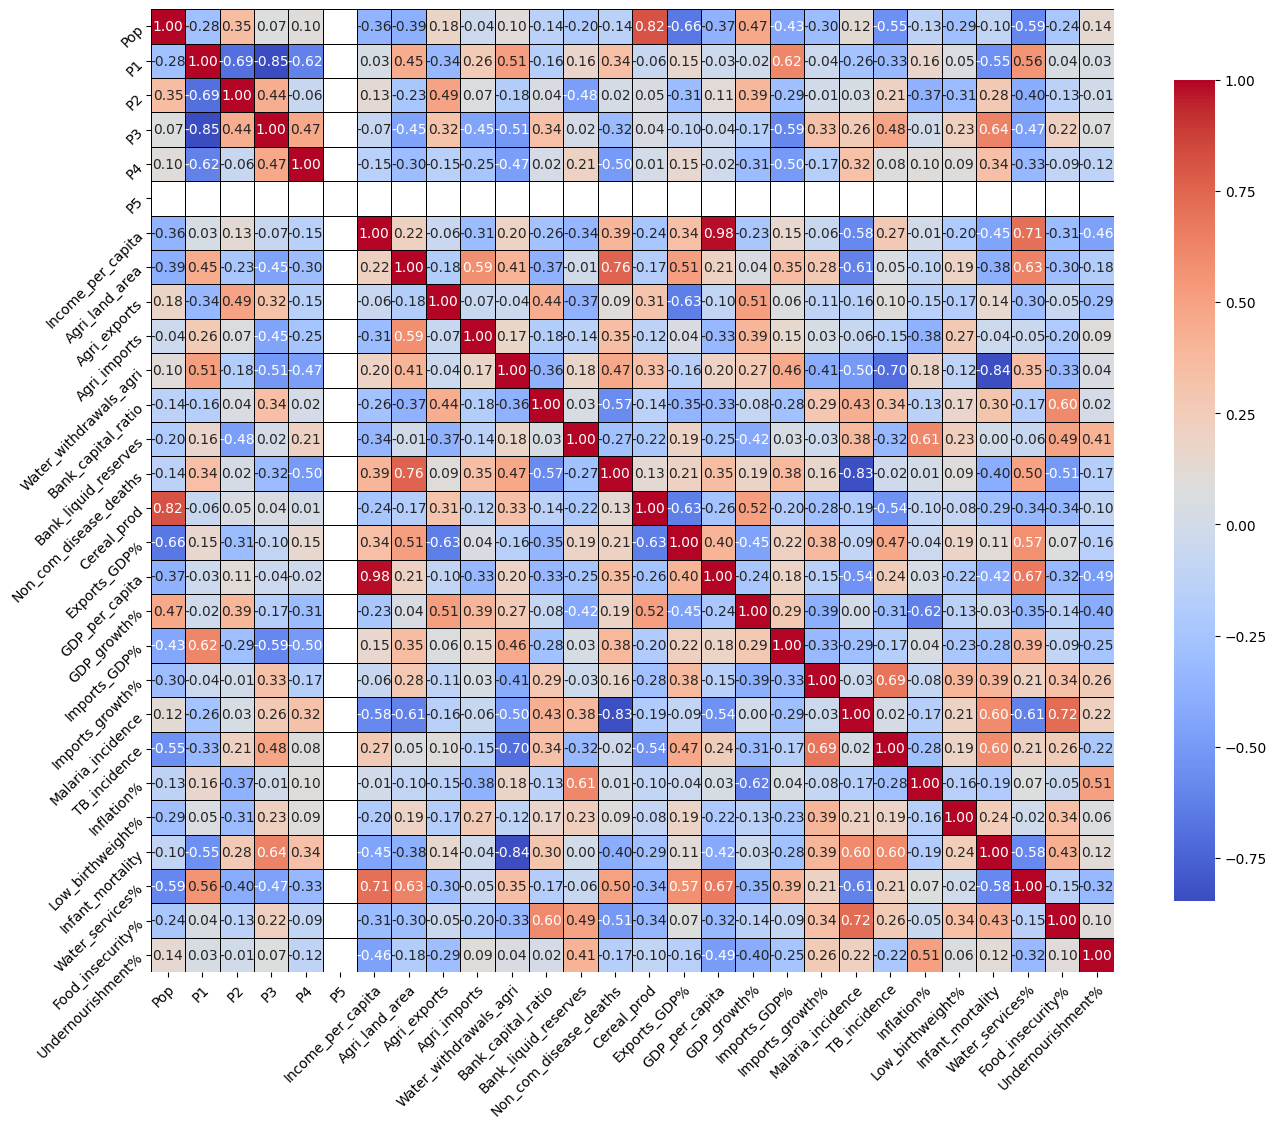

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.8},
            square=True, linecolor='black')

plt.xticks(rotation=45, ha='right', fontsize=10, rotation_mode='anchor')
plt.yticks(rotation=45, ha='right', fontsize=10, rotation_mode='anchor')

plt.tight_layout(pad=2.0)

plt.show()

### Feed Forward Auto Encoder

In [ ]:
# data = df.to_numpy()
# data = data.astype('float32')
#Data split
#x_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('# of features: ',len(X[0]))

# of features:  23


In [ ]:
data = df.to_numpy()
data = data.astype('float32')

#Data split
x_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# autoencoder architecture
input_dim = x_train.shape[1]
latent_dim = 10

# Encoder
input_layer = layers.Input(shape=(input_dim,))
encoded = layers.Dense(20, activation='relu')(input_layer)
encoded = layers.Dense(15, activation='relu')(encoded)
encoded = layers.Dense(latent_dim, activation='relu',name='latent_space')(encoded)

# Decoder
decoded = layers.Dense(15, activation='relu')(encoded)
decoded = layers.Dense(20, activation='relu')(decoded)
decoded = layers.Dense(input_dim, activation='relu')(decoded)
output_layer = layers.Dense(input_dim, activation='sigmoid')(decoded)

# Autoencoder Model
autoencoder = models.Model(inputs=input_layer, outputs=output_layer)

# Compile the autoencoder
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the autoencoder
autoencoder.fit(
    x_train,
    x_train,
    epochs=20,
    shuffle=True,
    validation_data=(X_test, X_test)
)

encoder = models.Model(inputs=input_layer, outputs=encoded)

# Example usage: Encode test data
encoded_data = encoder.predict(X_test)

print("Encoded data shape:", encoded_data.shape)


Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.1121 - val_loss: 0.1282
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - loss: 0.1118 - val_loss: 0.1281
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.1115 - val_loss: 0.1280
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.1112 - val_loss: 0.1279
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.1109 - val_loss: 0.1279
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 0.1107 - val_loss: 0.1278
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.1104 - val_loss: 0.1277
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.1102 - val_loss: 0.1277
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.1099 - val_loss: 0.1276
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.1096 - val_loss: 0.1276
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.1093 - val_loss: 0.1276
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 0.1090 - val_loss: 0.1275


In [ ]:
#Encode Data
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('latent_space').output)
x_train_encoded = encoder.predict(x_train)
X_test_encoded = encoder.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


### Data preperation for GANS

In [ ]:
x_train_gans = x_train_encoded
y_train_gans = y_train

X_test_gans = X_test_encoded
y_test_gans = y_test

# Normalize the data
x_train_gans = tf.convert_to_tensor(x_train_gans, dtype=tf.float32)
y_train_gans = tf.convert_to_tensor(y_train_gans, dtype=tf.float32)

# Combine input and output features
train_data = tf.concat([x_train_gans, y_train_gans], axis=1)



In [ ]:
print(len(train_data[0]))

15


# GANS

In [ ]:
import numpy as np
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam

# Define the dimensions for the input data
input_dim = 15  # Number of features in your dataset
latent_dim = 15  # Latent space dimension for the generator

# Define the generator model
def build_generator():
    model = models.Sequential()
    model.add(layers.Dense(128, input_dim=latent_dim, activation='relu'))  # Increased layer size
    model.add(layers.Dense(256, activation='relu'))  # Additional layer for more capacity
    model.add(layers.Dense(input_dim, activation='linear'))  # Output layer should match data dimensions
    return model

# Define the discriminator model
def build_discriminator():
    model = models.Sequential()
    model.add(layers.Dense(256, input_dim=input_dim, activation='relu'))  # Increased layer size
    model.add(layers.Dense(128, activation='relu'))  # Additional layer
    model.add(layers.Dense(64, activation='relu'))  # Another hidden layer
    model.add(layers.Dense(1, activation='sigmoid'))  # Output probability
    return model

# Define the GAN model (generator + discriminator)
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = models.Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

# Create the generator and discriminator
generator = build_generator()
discriminator = build_discriminator()

# Compile the discriminator
discriminator.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

# Compile the GAN (combine generator and discriminator)
gan = build_gan(generator, discriminator)
gan.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy')

# Train the GAN on the dataset (use your preprocessed data here)
def train_gan(generator, discriminator, gan, x_train, epochs=1000, batch_size=10):
    batch_count = x_train.shape[0] // batch_size

    for epoch in range(epochs):
        for _ in range(batch_count):
            # Generate random noise
            noise = np.random.normal(0, 1, (batch_size, latent_dim))

            # Generate fake data
            generated_data = generator.predict(noise)

            # Randomly select a batch of real data
            real_data = x_train[np.random.randint(0, x_train.shape[0], batch_size)]

            # Labels for real and fake data
            real_labels = np.ones((batch_size, 1))
            fake_labels = np.zeros((batch_size, 1))

            # Train the discriminator on real data
            d_loss_real = discriminator.train_on_batch(real_data, real_labels)
            #print(f"Discriminator Output (real): {d_loss_real[0]}")

            # Train the discriminator on fake data
            d_loss_fake = discriminator.train_on_batch(generated_data, fake_labels)
            #print(f"Discriminator Output (fake): {d_loss_fake[0]}")

            # Calculate total discriminator loss
            d_loss = 0.5 * (d_loss_real[0] + d_loss_fake[0])  # Extracting the loss value

            # Train the generator via the GAN model
            noise = np.random.normal(0, 1, (batch_size, latent_dim))  # Generate new noise
            g_loss = gan.train_on_batch(noise, real_labels)  # Want the generator to fool the discriminator

        # Print losses for each epoch
        print(f"Epoch {epoch+1}/{epochs}, Discriminator Loss: {d_loss}, Generator Loss: {g_loss[0]}")  # g_loss[0] gives the loss value

# Train the GAN on the dataset (use your preprocessed data here)
train_data = np.random.randn(1000, input_dim)  # Dummy training data for demonstration
train_gan(generator, discriminator, gan, train_data, epochs=10, batch_size=64)

# Generate new data using the trained generator
generated_data = generator.predict(np.random.normal(0, 1, (100, latent_dim)))  # Generate 10 new samples

# Split the generated data into features (X) and targets (y)
# For example, assuming the first 10 columns are features and the last 5 columns are targets
n_features = 10
X_generated = generated_data[:, :n_features]  # First 10 columns
y_generated = generated_data[:, n_features:]  # Last 5 columns

print("Generated Features:", X_generated)
print("Generated Targets:", y_generated)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Epoch 1/10, Discriminator Loss: 0.7263194918632507, Generator Loss: 0.7298839688301086
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2

### Deep Nueral Network

In [ ]:
#Data split
x_train, X_test, y_train, y_test = train_test_split(X_generated, y_generated, test_size=0.2, random_state=42)
print(len(x_train[0]))

10


In [ ]:
model = Sequential([
    Dense(23, input_dim=len(x_train[0]), activation='relu'),  # Input layer and hidden layers
    Dense(16, activation='relu'),
    Dense(10, activation='relu'),
    Dense(8, activation='relu'),
    Dense(5, activation='linear')
])

model.compile(optimizer=Adam(learning_rate=0.01),
              loss='mean_squared_error',
              metrics=['accuracy', 'mean_absolute_error'])

# Display model summary
model.summary()

# Train the model
model.fit(x_train, y_train, epochs=50)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_51 (Dense)                     │ (None, 23)                  │             253 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 16)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 10)                  │             170 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ (None, 8)                   │              88 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 5)                   │              45 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 940 (3.67 KB)

 Trainable params: 940 (3.67 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.0281 - loss: 165.2682 - mean_absolute_error: 12.3415
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 160.2801 - mean_absolute_error: 12.1123 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 149.4785 - mean_absolute_error: 11.6272 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 135.4152 - mean_absolute_error: 10.8901 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 108.9740 - mean_absolute_error: 9.3532
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 79.1991 - mean_absolute_error: 7.2940  
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 53.7418 - mean_absolute_error: 5.9707 
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 50.5680 - mean_absolute_error: 6.2387 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - a

### Testing

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy, test_mae = model.evaluate(X_test, y_test, verbose=1)

# Print detailed test evaluation results
print(f"Test Loss (Mean Squared Error): {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Mean Absolute Error (MAE): {test_mae:.4f}")

# Optionally, make predictions to compare with true values
predictions = model.predict(X_test)
print("\nSample Predictions vs Actual Values:")
for i in range(5):  # Display first 5 predictions for comparison
    print(f"Prediction: {predictions[i]}, Actual: {y_test[i]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - accuracy: 1.0000 - loss: 0.2317 - mean_absolute_error: 0.3819
Test Loss (Mean Squared Error): 0.2317
Test Accuracy: 1.0000
Test Mean Absolute Error (MAE): 0.3819
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step

Sample Predictions vs Actual Values:
Prediction: [ 16.687536 -13.099143 -12.522548  18.402954   8.61738 ], Actual: [ 16.730375  -13.216094  -12.2065525  18.104256    9.074759 ]
Prediction: [ 16.785673 -13.210917 -12.659103  18.468914   8.693126], Actual: [ 17.050177  -12.9470415 -12.9803915  18.42427     9.372843 ]
Prediction: [ 17.998869 -14.172734 -13.604556  19.768997   9.336189], Actual: [ 18.41365  -14.167637 -14.5981    20.376776  10.10206 ]
Prediction: [ 12.984703  -10.247389   -9.798515   14.3221855   6.7169867], Actual: [ 13.063575  -9.624265 -10.040103  14.652028   7.124806]
Prediction: [ 15.722795 -12.376814 -11.853598  17.310835   8.137876], Actual: [ 15.654233  -12.333767  -11.769048   17.756578    7.9188523]
